In [77]:
import pandas as pd
import numpy as np
import openpyxl
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [78]:
TOP = Path.cwd().as_posix().replace('notebooks','')
raw_dir = Path(TOP) / 'data' /'raw'
external_dir = Path(TOP) / 'data' /'external'
interim_dir = Path(TOP) / 'data' /'interim'
processed_dir = Path(TOP) /'data' / 'processed'
figures_dir = Path(TOP)/ 'reports'/'figures'

In [79]:
fhm = pd.read_excel(raw_dir /'fhm.xlsx')

In [80]:
fhm.shape

(617, 54)

In [81]:
fhm.columns

Index(['STRUCTURE_SMILES', 'ExcessToxicityIndex', 'StudyType', 'LC50_Ratio',
       'ChemicalNote', 'STRUCTURE_ChemicalName_IUPAC',
       'ChemicalReplicateCount', 'LC50_mmol', 'MOA_Confidence', 'LC50_mg',
       'STRUCTURE_Parent_SMILES', 'DSSTox_CID', 'ChemClass_FHM',
       'org.openscience.cdk.qsar.descriptors.molecular.TPSADescriptor',
       'TestSubstance_CASRN', 'DTXSID', 'PREFERRED_NAME', 'CASRN', 'SMILES',
       'QSAR_READY_SMILES', 'FishBehaviorTest', 'DSSTox_SID',
       'NO. OF FILLED LEVELS', 'STRUCTURE_TestedForm_DefinedOrganic',
       'CORE-CORE REPULSION', 'STRUCTURE_InChI',
       'ambit.data.descriptors.MaximumDiameterDescriptor',
       'FishAcuteToxSyndrome', 'STRUCTURE_ChemicalType', 'MOA',
       'MOA_MixtureTest', 'TestSubstance_Description',
       'ambit.data.descriptors.CrossSectionalDiameterDescriptor',
       'ELECTRONIC ENERGY', 'Species', 'MOLECULAR WEIGHT', 'STRUCTURE_Formula',
       'EIGENVALUES', 'CLOGP',
       'org.openscience.cdk.qsar.descriptor

In [82]:
fhm.head()  

,STRUCTURE_SMILES,ExcessToxicityIndex,StudyType,LC50_Ratio,ChemicalNote,STRUCTURE_ChemicalName_IUPAC,ChemicalReplicateCount,LC50_mmol,MOA_Confidence,LC50_mg,...,org.openscience.cdk.qsar.descriptors.atomic.WeightDescriptor,eHOMO,TestSubstance_ChemicalName,STRUCTURE_MolecularWeight,IONIZATION POTENTIAL,org.openscience.cdk.qsar.descriptors.molecular.XLogPDescriptor,TOTAL ENERGY,Endpoint,MLOGP,STRUCTURE_Shown
0,C1=CC(C=O)=CC(OC)=C1OCCCCCC,1.6,acute toxicity,NR,blank,4-(hexyloxy)-3-(methyloxy)benzaldehyde,1,0.01130,D,2.67,...,236.141245,-9.63326,4-(hexyloxy)-m-anisaldehyde,236.3102,9.63326,3.768,-3021.43021,LC50,blank,tested chemical
1,C1(OC)=C([N+]([O-])=O)C(C=O)=CC(Br)=C1O,3.6,acute toxicity,1.00 r48,NaN,5-bromo-4-hydroxy-3-(methyloxy)-2-nitrobenzald...,1,0.26600,D,73.30,...,274.942933,-10.82970,5-bromo-2-nitrovanillin,276.0431,10.82970,1.649,-3253.93456,LC50,M,tested chemical
2,CCCCCCCCOC(=O)C1=CC=CC(C(=O)OCCCCCCCC)=C1,0.0,acute toxicity,NT,NaN,"dioctyl benzene-1,3-dicarboxylate",1,NaN,NaN,NaN,...,390.277010,ambit.exceptions.DescriptorCalculationExceptio...,Di-n-octylisophthalate,390.5618,ambit.exceptions.DescriptorCalculationExceptio...,9.146,ambit.exceptions.DescriptorCalculationExceptio...,LC50,NaN,tested chemical
3,C1=CC(Cl)=CC=C1OC2=C([N+](=O)[O-])C=CC=C2,1.4,acute toxicity,2,NaN,1-[(4-chlorophenyl)oxy]-2-nitrobenzene,1,0.00769,B,1.92,...,249.019271,ambit.exceptions.DescriptorCalculationExceptio...,p-chlorophenyl-o-nitrophenyl ether,249.6531,ambit.exceptions.DescriptorCalculationExceptio...,4.017,ambit.exceptions.DescriptorCalculationExceptio...,LC50,NaN,tested chemical
4,CC1=C(NC=O)C=CC=C1Cl,5.0,acute toxicity,1.02,NaN,N-(3-chloro-2-methylphenyl)formamide,1,0.27500,C,46.60,...,169.029442,-9.41976,3'-chloro-o-formotoluidide,169.6103,9.41976,1.888,-2031.09531,LC50,NaN,tested chemical


In [83]:
fhm = (fhm
 .dropna(subset = ['SMILES'])
 .filter(['DTXSID', 'PREFERRED_NAME', 'CASRN', 'SMILES',
       'QSAR_READY_SMILES','ChemClass_FHM','LC50_mg','LC50_mmol','MOA','MOA_Confidence',])

 
 )

In [84]:
fhm['SMILES'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 617 entries, 0 to 616
Series name: SMILES
Non-Null Count  Dtype 
--------------  ----- 
617 non-null    object
dtypes: object(1)
memory usage: 4.9+ KB


In [85]:
fhm.to_csv(raw_dir/'fhm_cleaned.csv')

In [86]:
fhm[['PREFERRED_NAME','MOA']]

,PREFERRED_NAME,MOA
0,4-(Hexyloxy)-m-anisaldehyde,REACTIVE
1,5-Bromo-2-nitrovanillin,REACTIVE
2,Dioctylisophthalate,ND
3,p-Chlorophenyl-o-nitrophenyl ether,NARCOSIS I
4,3'-Chloro-o-formotoluidide,NARCOSIS I
...,...,...
612,"3-(3,4-Dichlorophenoxy)benzaldehyde",NARCOSIS I
613,"2,4-Dinitro-1-naphthol sodium salt dihydrate (...",UNCOUPLER
614,4-tert-Butylstyrene,REACTIVE
615,Demeton,ACHE


In [87]:
fhm.MOA.value_counts()

MOA
NARCOSIS I           241
REACTIVE              97
UNSURE                73
MIXED                 45
NARCOSIS II           38
ND                    36
NARCOSIS III          26
ACHE                  17
NARCOSIS I and II     13
UNCOUPLER             12
NEUROTOX               9
NEURODEP               6
BLOCK                  4
Name: count, dtype: int64

In [88]:

moa_dict = {k: group['DTXSID'].tolist() for k, group in fhm.groupby('MOA') if len(group['DTXSID'].tolist()) >5}

In [89]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import AllChem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import DataStructs
import grakel
import networkx as nx

MOLS = dict(zip(fhm['DTXSID'], fhm['SMILES']))
MOLS = {k:Chem.MolFromSmiles(v) for k,v in MOLS.items()}
MOLS = {i:j for i,j in MOLS.items() if j}
FP0 = pd.DataFrame([np.array(AllChem.GetMorganFingerprintAsBitVect(i,3,2048)) for i in MOLS.values()])
FP0.index = MOLS.keys()
FP0.columns = ['mrgn_%d'%i for i in FP0.columns]

In [90]:
from scipy.spatial.distance import pdist, squareform

In [91]:
D_mgrn = pd.DataFrame(squareform(pdist(FP0, 'jaccard')), columns = FP0.index, index = FP0.index)

In [92]:
S_mgrn = 1-D_mgrn

<Axes: >

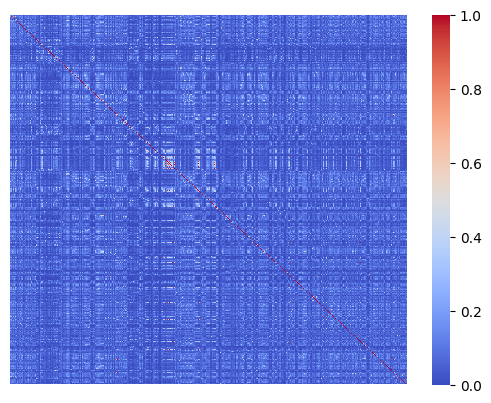

In [93]:
sns.heatmap(S_mgrn, cmap = 'coolwarm',xticklabels=False, yticklabels=False)

In [94]:
def transform_matrix(df):
    a = df.where(np.triu(np.ones(df.shape)).astype('bool'))
    a = df.stack().reset_index()
    a = a.where(a.iloc[:,0] != a.iloc[:,1])
    a = a.dropna()
    a.columns = ['target', 'source', 'jaccard']
    a = a.sort_values(by = 'jaccard', ascending = False)
    a['bins'] = pd.cut(x = a['jaccard'], bins = [-0.000001,0.1,0.3, 0.5,0.7,1])
    return a, a['bins'].value_counts(dropna = False, normalize = True)

## ToxPrints

In [95]:
txps = pd.read_excel(raw_dir/'fhm_toxprints.xlsx')

In [96]:
txps.columns

Index(['INPUT', 'FOUND_BY', 'DTXSID', 'PREFERRED_NAME',
       'atom:element_main_group', 'atom:element_metal_group_I_II',
       'atom:element_metal_group_III', 'atom:element_metal_metalloid',
       'atom:element_metal_poor_metal', 'atom:element_metal_transistion_metal',
       ...
       'ring:polycycle_bicyclo_propene', 'ring:polycycle_spiro_[2.2]pentane',
       'ring:polycycle_spiro_[2.5]octane', 'ring:polycycle_spiro_[4.5]decane',
       'ring:polycycle_spiro_1_4-dioxaspiro[4.5]decane',
       'ring:polycycle_tricyclo_[3.5.5]_cyclopropa[cd]pentalene',
       'ring:polycycle_tricyclo_[3.7.7]bullvalene',
       'ring:polycycle_tricyclo_[3.7.7]semibullvalene',
       'ring:polycycle_tricyclo_adamantane',
       'ring:polycycle_tricyclo_benzvalene'],
      dtype='object', length=733)

In [97]:
S_txp = (txps
         .drop_duplicates(subset = ['DTXSID'], keep = 'first')
 .set_index('DTXSID')
 .drop(['INPUT', 'FOUND_BY', 'PREFERRED_NAME'], axis = 1)
.dropna(how = 'any')
 .pipe(lambda df : 1- pd.DataFrame(squareform(pdist(df, 'jaccard')), columns = df.index, index = df.index))
 .rename_axis(index=None, columns=None) 
)

In [98]:
S_txp.shape

(615, 615)

<Axes: >

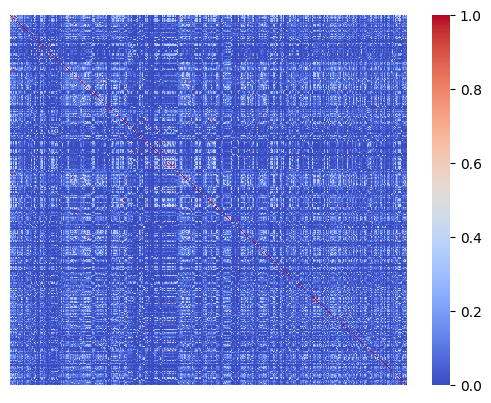

In [99]:
sns.heatmap(S_txp,cmap = 'coolwarm',xticklabels=False, yticklabels=False)

In [100]:
import grakel
import networkx as nx

In [101]:
#| echo: false
def smile_to_mol_graph(smile):
    mol = Chem.MolFromSmiles(smile)
    g = nx.Graph()
    
    # Add nodes with atom properties
    for atom in mol.GetAtoms():
        node_label = {
    "symbol": atom.GetSymbol(),
    "degree": atom.GetDegree(),
    "hybridization": str(atom.GetHybridization()),
    "aromaticity": atom.GetIsAromatic(),
    "formal_charge": atom.GetFormalCharge(),
    "implicit_hydrogen_count": atom.GetTotalNumHs()
}
        g.add_node(atom.GetIdx(), atom_label = str(node_label))

    # Add edges with bond properties
    for bond in mol.GetBonds():
        g.add_edge(bond.GetBeginAtomIdx(), 
                   bond.GetEndAtomIdx(), 
                   bond_type=str(bond.GetBondType()))

    return g

In [102]:
graphs = {k:smile_to_mol_graph(v) for k,v in zip(fhm['DTXSID'], fhm['SMILES'])}

In [103]:
grakel_graphs = grakel.graph_from_networkx(list(graphs.values()),node_labels_tag='atom_label') 



In [104]:


# Compute the WL kernel
wl_kernel = grakel.WeisfeilerLehman(base_graph_kernel=grakel.VertexHistogram,normalize=True)
kernel_matrix = wl_kernel.fit_transform(grakel_graphs)

In [105]:
p1 = pd.DataFrame(kernel_matrix, columns = graphs.keys(), index = graphs.keys())



<Axes: >

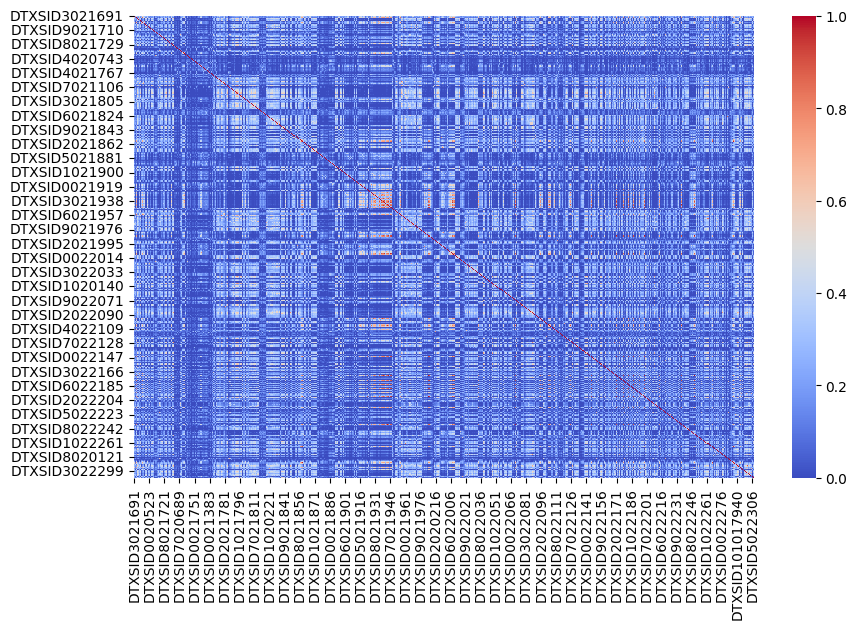

In [106]:
plt.figure(figsize = (10,6))
sns.heatmap(p1, cmap = 'coolwarm')

In [107]:
len(moa_dict['NARCOSIS I'])

241

Text(0.5, 1.0, 'Morgan')

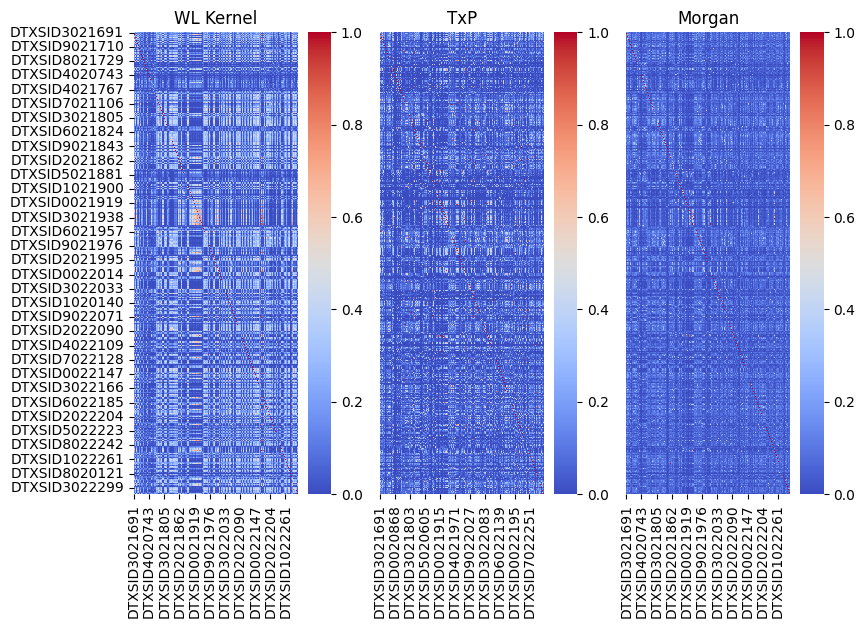

In [108]:
f, ax = plt.subplots(1,3, figsize=(9,6))
sns.heatmap(p1 , cmap = 'coolwarm',  ax= ax[0])
ax[0].set_title("WL Kernel")
sns.heatmap(S_txp , cmap = 'coolwarm', ax= ax[1], yticklabels=False)
ax[1].set_title("TxP")
sns.heatmap(S_mgrn, cmap = 'coolwarm',  ax= ax[2],yticklabels=False)
ax[2].set_title("Morgan")

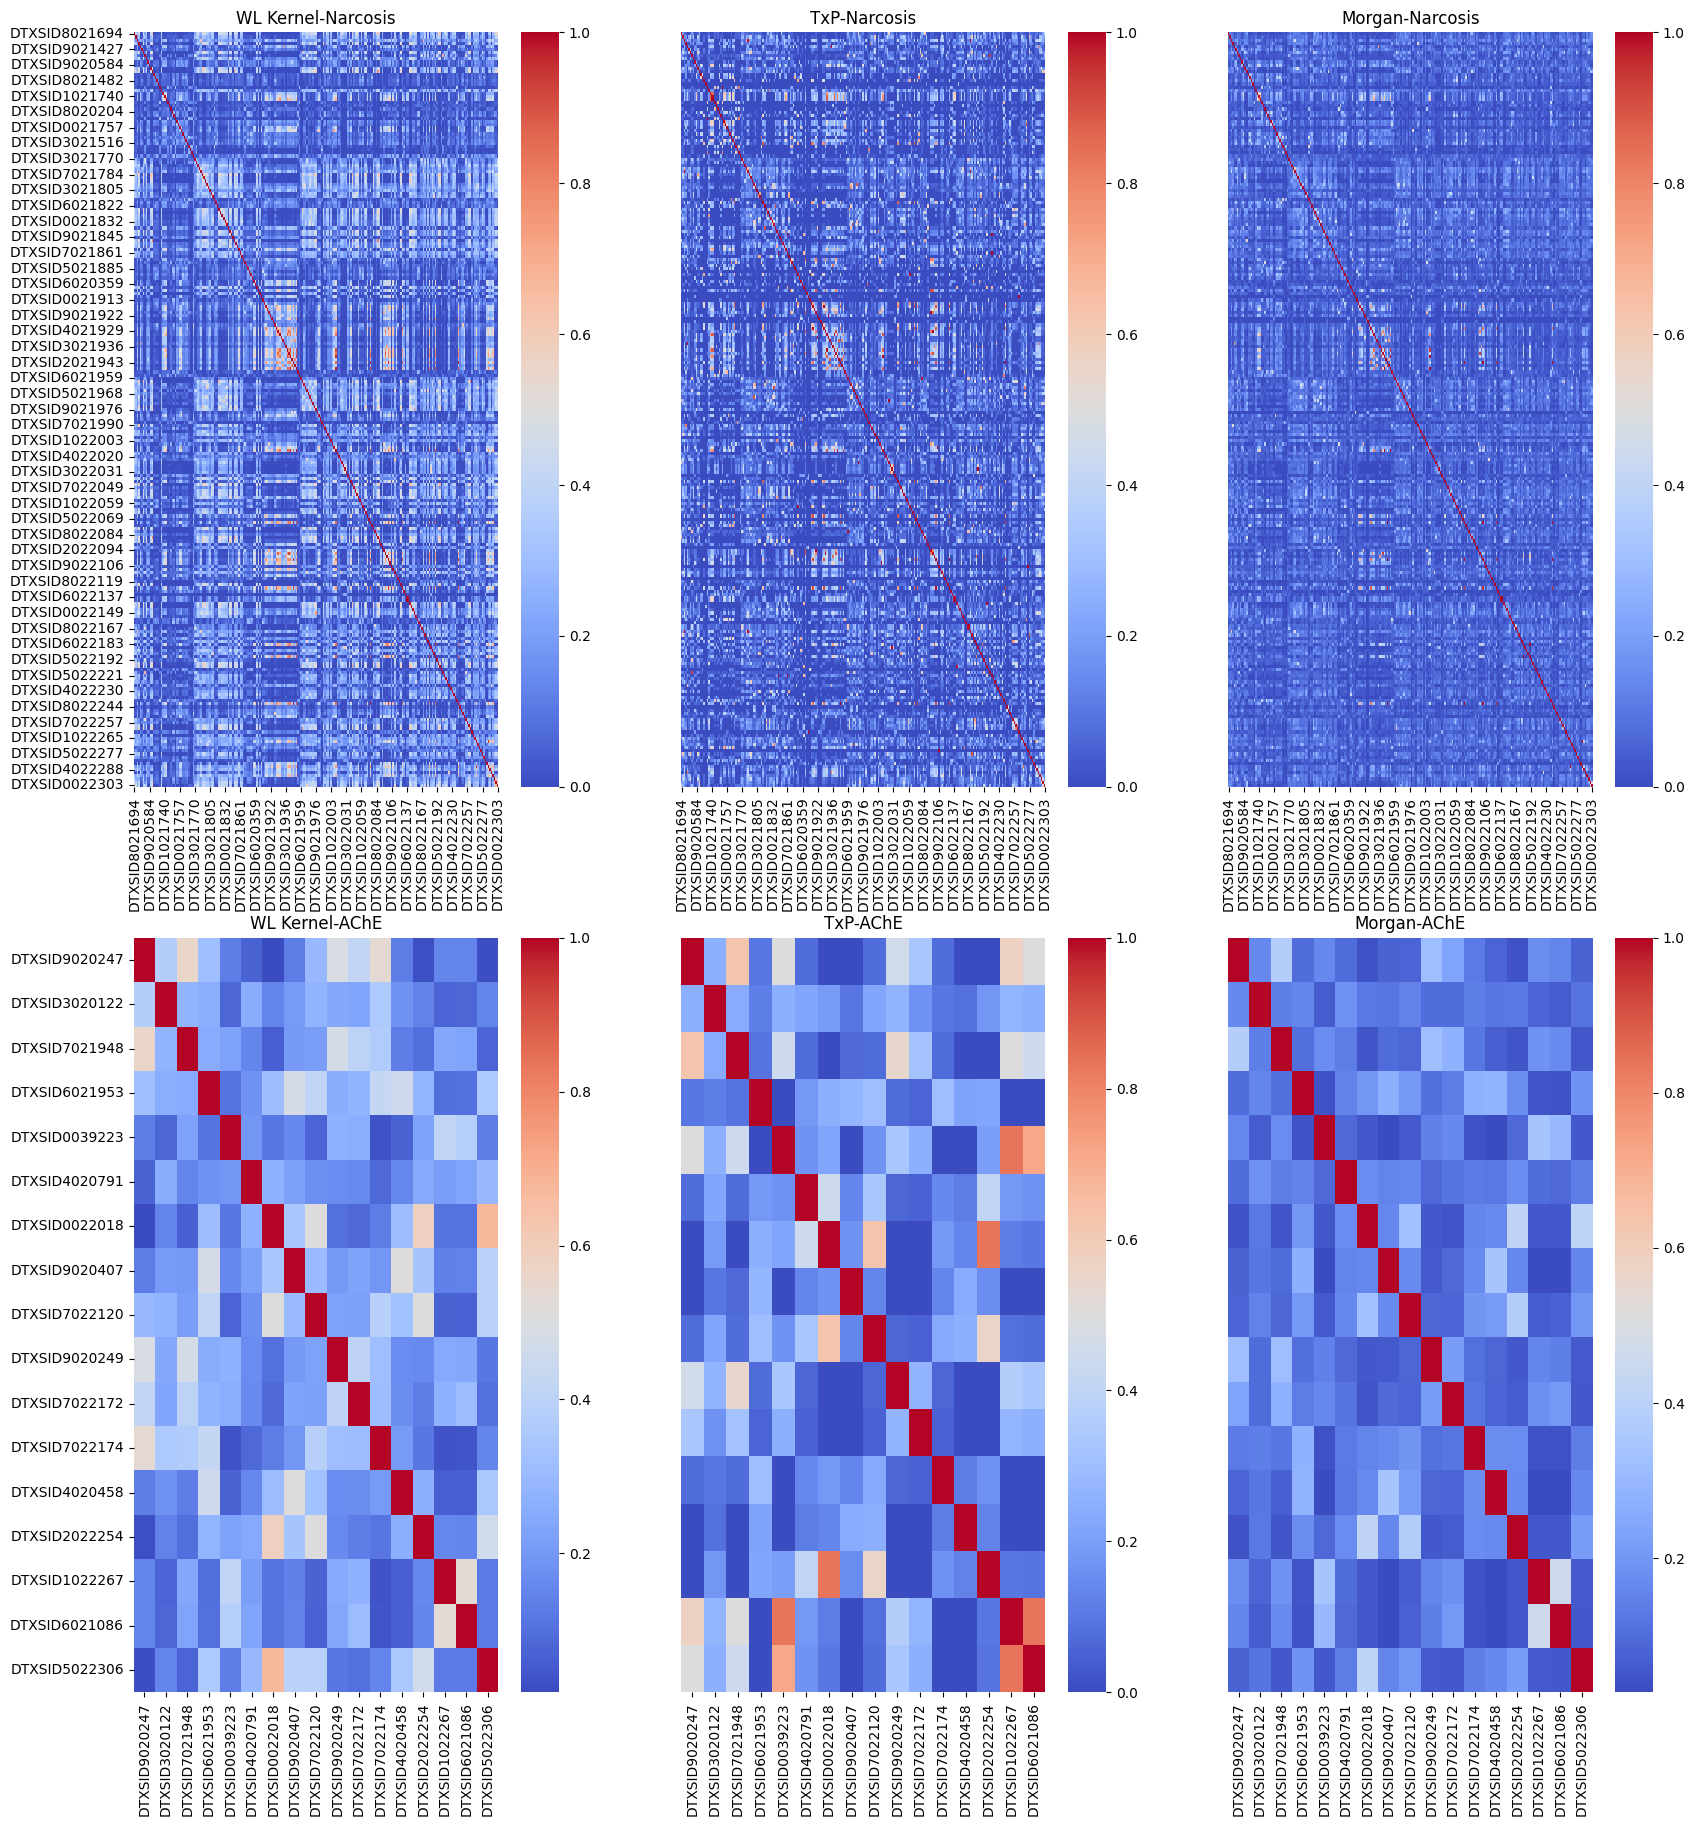

In [109]:
f, ax = plt.subplots(2,3, figsize=(20,20))
sns.heatmap(p1.loc[moa_dict['NARCOSIS I'],moa_dict['NARCOSIS I']] , cmap = 'coolwarm',  ax= ax[0,0])
ax[0,0].set_title("WL Kernel-Narcosis")
sns.heatmap(S_txp.loc[moa_dict['NARCOSIS I'],moa_dict['NARCOSIS I']] , cmap = 'coolwarm', ax= ax[0,1], yticklabels=False)
ax[0,1].set_title("TxP-Narcosis")
sns.heatmap(S_mgrn.loc[moa_dict['NARCOSIS I'],moa_dict['NARCOSIS I']] , cmap = 'coolwarm',  ax= ax[0,2],yticklabels=False)
ax[0,2].set_title("Morgan-Narcosis")
plt.subplots_adjust(bottom=0.05)
sns.heatmap(p1.loc[moa_dict['ACHE'],moa_dict['ACHE']] , cmap = 'coolwarm',  ax= ax[1,0])
ax[1,0].set_title("WL Kernel-AChE")
sns.heatmap(S_txp.loc[ache_ids,ache_ids] , cmap = 'coolwarm', ax= ax[1,1], yticklabels=False)
ax[1,1].set_title("TxP-AChE")
sns.heatmap(S_mgrn.loc[moa_dict['ACHE'],moa_dict['ACHE']] , cmap = 'coolwarm',  ax= ax[1,2],yticklabels=False)
ax[1,2].set_title("Morgan-AChE")
f.savefig(figures_dir/'fhm_sim.png', dpi = 300, bbox_inches='tight')

In [110]:

ache_ids= moa_dict['ACHE'].copy()
ache_ids.remove('DTXSID5022306')

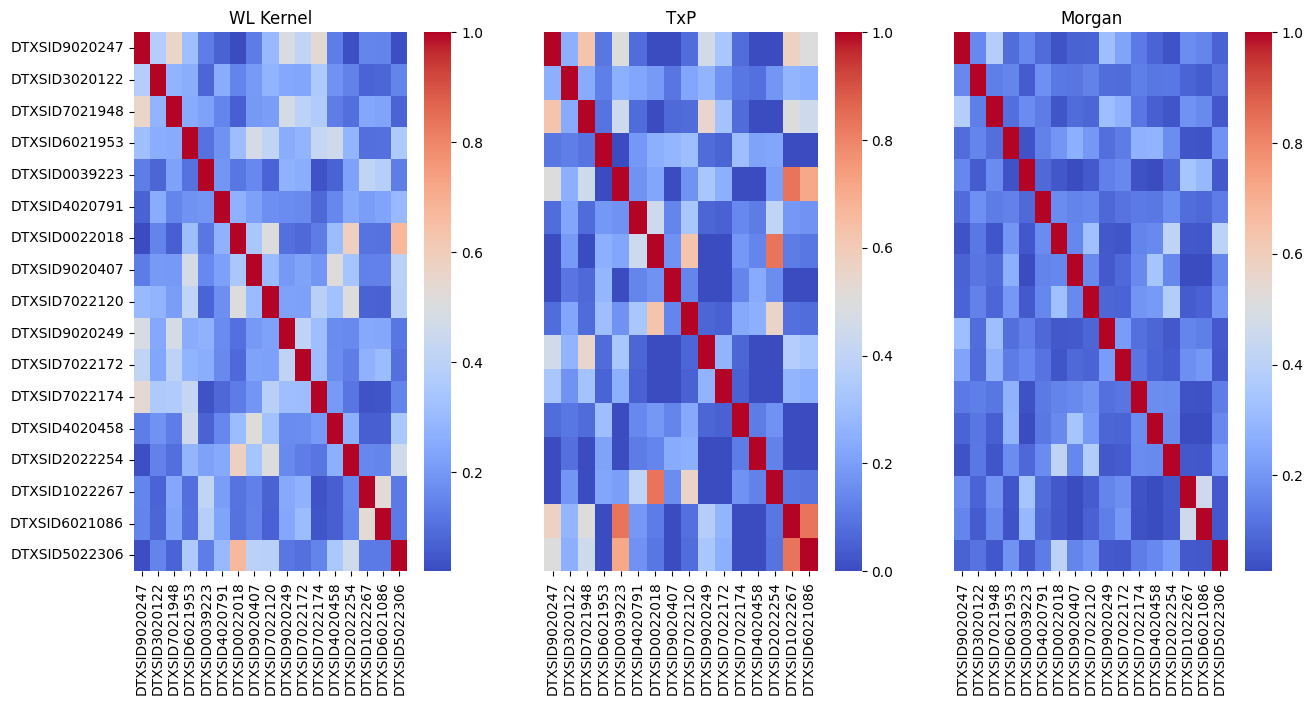

In [111]:
f, ax = plt.subplots(1,3, figsize=(15,7))
sns.heatmap(p1.loc[moa_dict['ACHE'],moa_dict['ACHE']] , cmap = 'coolwarm',  ax= ax[0])
ax[0].set_title("WL Kernel")
sns.heatmap(S_txp.loc[ache_ids,ache_ids] , cmap = 'coolwarm', ax= ax[1], yticklabels=False)
ax[1].set_title("TxP")
sns.heatmap(S_mgrn.loc[moa_dict['ACHE'],moa_dict['ACHE']] , cmap = 'coolwarm',  ax= ax[2],yticklabels=False)
ax[2].set_title("Morgan")
f.savefig(figures_dir/'fhm_sim_ache.png', dpi = 300, bbox_inches='tight')

In [112]:
transform_matrix(p1.loc[moa_dict['NARCOSIS I'], moa_dict['NARCOSIS I']])[1]

bins
(-1e-06, 0.1]    0.524550
(0.1, 0.3]       0.332158
(0.3, 0.5]       0.120194
(0.5, 0.7]       0.018672
(0.7, 1.0]       0.004426
Name: proportion, dtype: float64

In [113]:
transform_matrix(S_mgrn.loc[moa_dict['NARCOSIS I'], moa_dict['NARCOSIS I']])[1]

bins
(-1e-06, 0.1]    0.767669
(0.1, 0.3]       0.217185
(0.3, 0.5]       0.012102
(0.5, 0.7]       0.001729
(0.7, 1.0]       0.001314
Name: proportion, dtype: float64

In [114]:
transform_matrix(S_txp.loc[moa_dict['NARCOSIS I'], moa_dict['NARCOSIS I']])[1]

bins
(-1e-06, 0.1]    0.710546
(0.1, 0.3]       0.217497
(0.3, 0.5]       0.057296
(0.5, 0.7]       0.008887
(0.7, 1.0]       0.005775
Name: proportion, dtype: float64

In [115]:
transform_matrix(p1.loc[moa_dict['ACHE'], moa_dict['ACHE']])[1]

bins
(0.1, 0.3]       0.558824
(0.3, 0.5]       0.220588
(-1e-06, 0.1]    0.161765
(0.5, 0.7]       0.058824
(0.7, 1.0]       0.000000
Name: proportion, dtype: float64

In [116]:
transform_matrix(S_mgrn.loc[moa_dict['ACHE'], moa_dict['ACHE']])[1]

bins
(0.1, 0.3]       0.492647
(-1e-06, 0.1]    0.426471
(0.3, 0.5]       0.080882
(0.5, 0.7]       0.000000
(0.7, 1.0]       0.000000
Name: proportion, dtype: float64

In [117]:
transform_matrix(S_txp.loc[ache_ids, ache_ids])[1]

bins
(-1e-06, 0.1]    0.433333
(0.1, 0.3]       0.358333
(0.3, 0.5]       0.133333
(0.5, 0.7]       0.041667
(0.7, 1.0]       0.033333
Name: proportion, dtype: float64

In [121]:
(transform_matrix(S_txp.loc[ache_ids, ache_ids])[0]
 
 .loc[lambda df: df["bins"] == pd.Interval(0.7, 1.0)]
 .target.unique()
)

array(['DTXSID6021086', 'DTXSID0039223', 'DTXSID0022018', 'DTXSID2022254',
       'DTXSID1022267'], dtype=object)

In [123]:
(transform_matrix(p1.loc[moa_dict['ACHE'], moa_dict['ACHE']])[0]
  .loc[lambda df: df["bins"] == pd.Interval(0.5, 0.7)]
 .target.unique()
)

array(['DTXSID5022306', 'DTXSID0022018', 'DTXSID2022254', 'DTXSID9020247',
       'DTXSID7021948', 'DTXSID7022174', 'DTXSID1022267', 'DTXSID6021086',
       'DTXSID4020458', 'DTXSID9020407', 'DTXSID7022120'], dtype=object)

In [139]:


p1.loc['DTXSID7022095'].reset_index().sort_values(by = 'DTXSID7022095', ascending = False).head().set_index('index')

,DTXSID7022095
index,
DTXSID7022095,1.000000
DTXSID3021938,0.925022
DTXSID4021929,0.859727
DTXSID7021940,0.783437
DTXSID8021939,0.783437


In [141]:
pd.concat([p1.loc['DTXSID7022095'].reset_index().sort_values(by = 'DTXSID7022095', ascending = False).head().set_index('index'), S_txp.loc[['DTXSID7022095'], ['DTXSID7022095',
 'DTXSID3021938',
 'DTXSID4021929',
 'DTXSID7021940',
 'DTXSID8021939']].T], axis = 1)

,DTXSID7022095,DTXSID7022095
DTXSID7022095,1.000000,1.000000
DTXSID3021938,0.925022,0.909091
DTXSID4021929,0.859727,1.000000
DTXSID7021940,0.783437,0.357143
DTXSID8021939,0.783437,0.357143


In [134]:
S_txp.loc['DTXSID7022095'].reset_index().sort_values(by = 'DTXSID7022095', ascending = False).head()

,index,DTXSID7022095
238,DTXSID4021929,1.000000
404,DTXSID7022095,1.000000
247,DTXSID3021938,0.909091
212,DTXSID6021903,0.900000
403,DTXSID2022094,0.818182


In [131]:
fhm[fhm['DTXSID'].isin(['DTXSID7022095',
 'DTXSID3021938',
 'DTXSID4021929',
 'DTXSID7021940',
 'DTXSID8021939'])]

,DTXSID,PREFERRED_NAME,CASRN,SMILES,QSAR_READY_SMILES,ChemClass_FHM,LC50_mg,LC50_mmol,MOA,MOA_Confidence
238,DTXSID4021929,1-Bromohexane,111-25-1,CCCCCCBr,CCCCCCBr,Saturated Hydrocarbons,3.450,0.02090,NARCOSIS I,B
247,DTXSID3021938,1-Bromooctane,111-83-1,CCCCCCCCBr,CCCCCCCCBr,Saturated Hydrocarbons,0.838,0.00434,NARCOSIS I,B
248,DTXSID8021939,1-Octanamine,111-86-4,CCCCCCCCN,CCCCCCCCN,Primary aliphatic amines,5.190,0.04020,UNSURE,NaN
249,DTXSID7021940,1-Octanol,111-87-5,CCCCCCCCO,CCCCCCCCO,Basic Alcohols,13.500,0.10400,NARCOSIS I,A
404,DTXSID7022095,1-Bromoheptane,629-04-9,CCCCCCCBr,CCCCCCCBr,Saturated Hydrocarbons,1.470,0.00821,NARCOSIS I,B
